In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/Coffee Shop Sales.csv")
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01-01-2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01-01-2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01-01-2023,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01-01-2023,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01-01-2023,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


# Check for missing values


In [6]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [7]:
#transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')


In [9]:
# Calculate total sales
df["total_sales"] = df["transaction_qty"] * df["unit_price"]



In [13]:
#Calculate total bills
df["total_bill"] = df["transaction_qty"] * df["unit_price"]


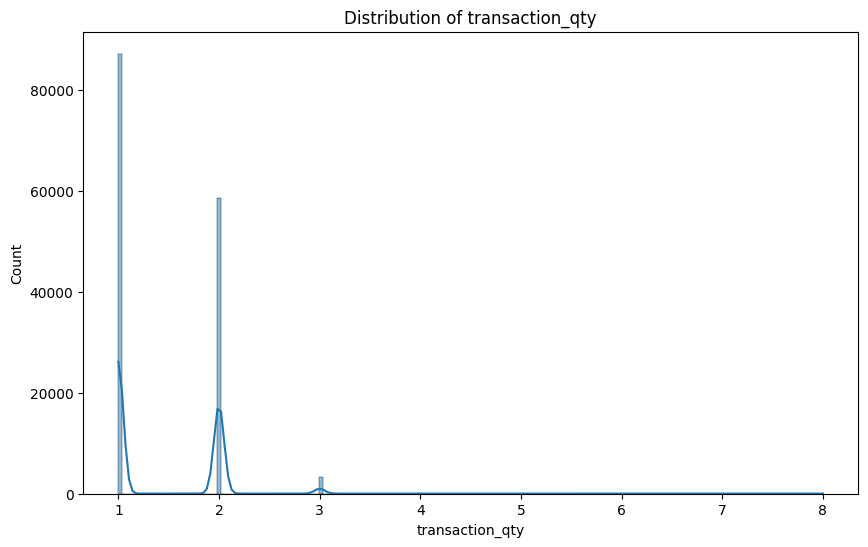

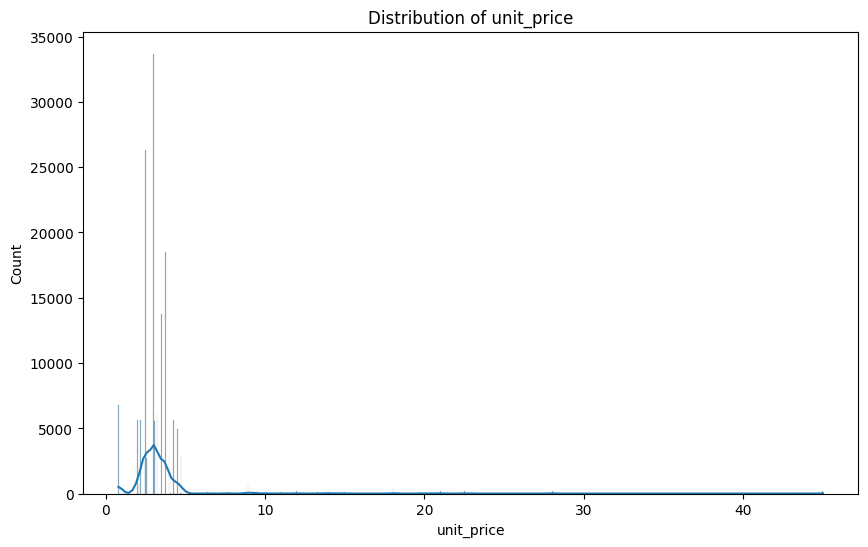

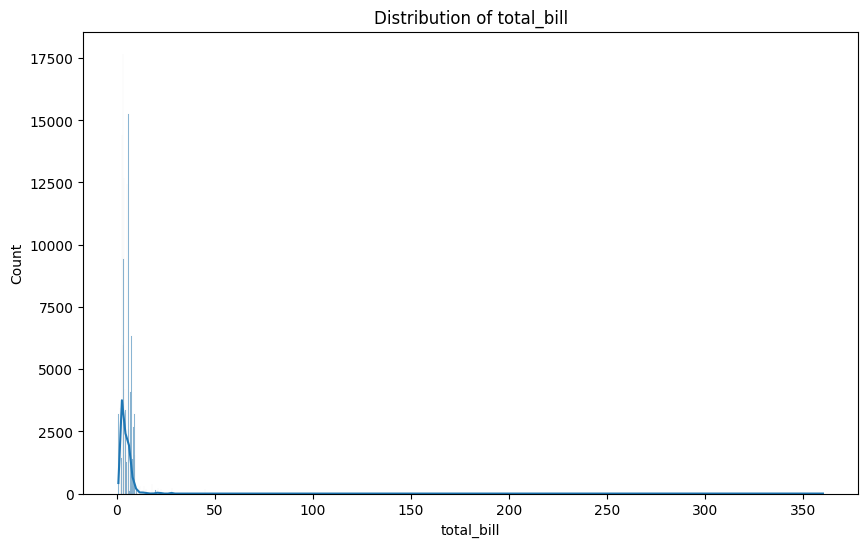

In [17]:

# Histograms for numerical attributes
numerical_cols = ['transaction_qty', 'unit_price', 'total_bill']  # Update with relevant numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


## Check for outliers in total_bill

In [19]:
# Total bill statistics

print(df["total_bill"].describe())


count    149116.000000
mean          4.686367
std           4.227099
min           0.800000
25%           3.000000
50%           3.750000
75%           6.000000
max         360.000000
Name: total_bill, dtype: float64


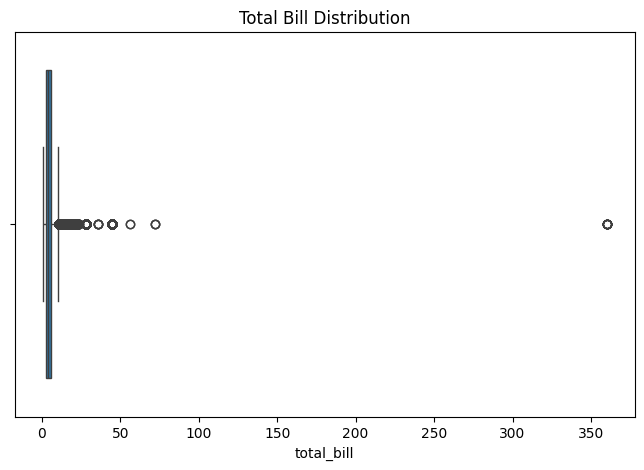

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["total_bill"])
plt.title("Total Bill Distribution")
plt.show()


## Top-Selling Stores or Products

In [21]:
# Revenue by store
store_revenue = df.groupby("store_location")["total_bill"].sum().reset_index().sort_values(by="total_bill", ascending=False)
print(store_revenue)

# Revenue by product category
category_revenue = df.groupby("product_category")["total_bill"].sum().reset_index().sort_values(by="total_bill", ascending=False)
print(category_revenue)


    store_location  total_bill
1   Hell's Kitchen   236511.17
0          Astoria   232243.91
2  Lower Manhattan   230057.25
     product_category  total_bill
2              Coffee   269952.45
8                 Tea   196405.95
0              Bakery    82315.64
4  Drinking Chocolate    72416.00
3        Coffee beans    40085.25
1             Branded    13607.00
6           Loose Tea    11213.60
5            Flavours     8408.80
7  Packaged Chocolate     4407.64


## Exact month and day info

In [22]:
# Extract month, week, and day of the week
df["month"] = df["transaction_date"].dt.month
df["week"] = df["transaction_date"].dt.isocalendar().week
df["day_of_week"] = df["transaction_date"].dt.day_name()


## Monthly sales trend

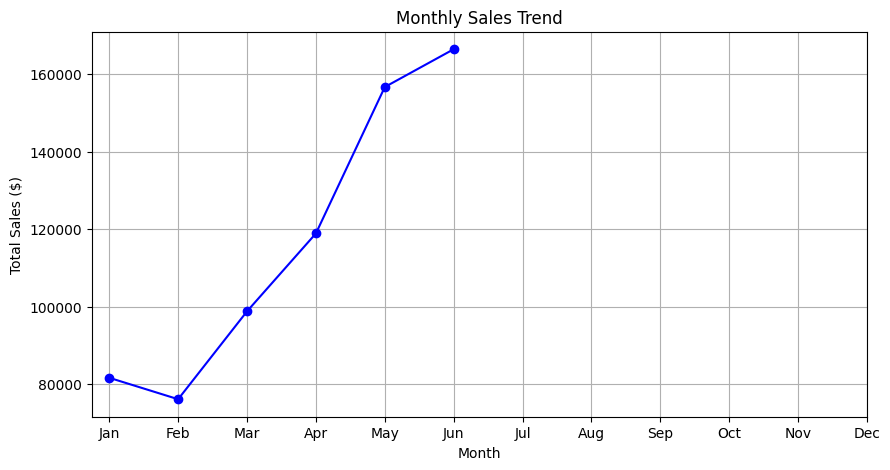

In [23]:
import matplotlib.pyplot as plt

# Aggregate total sales per month
monthly_sales = df.groupby("month")["total_bill"].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales["month"], monthly_sales["total_bill"], marker="o", linestyle="-", color="blue")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show()


## Hourly sales Pattern

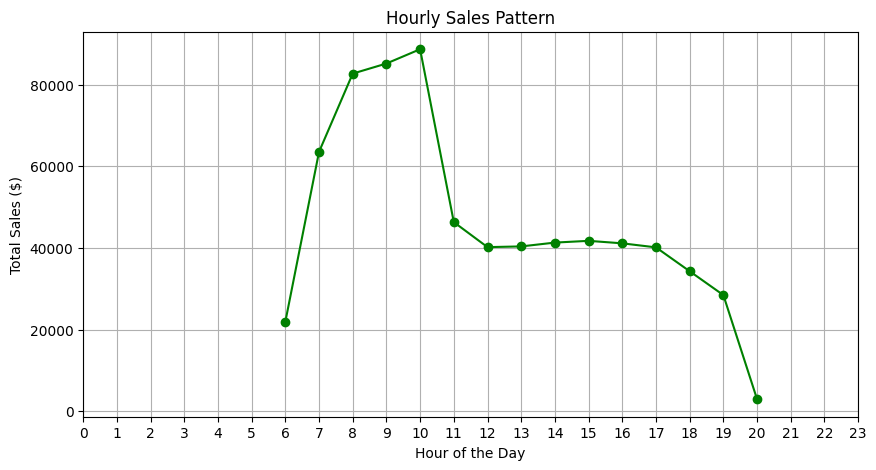

In [24]:
# Extract hour from transaction_time
df["hour"] = pd.to_datetime(df["transaction_time"], format="%H:%M:%S").dt.hour

# Aggregate total sales per hour
hourly_sales = df.groupby("hour")["total_bill"].sum().reset_index()

# Plot hourly sales trend
plt.figure(figsize=(10, 5))
plt.plot(hourly_sales["hour"], hourly_sales["total_bill"], marker="o", linestyle="-", color="green")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales ($)")
plt.title("Hourly Sales Pattern")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


## Best-Selling Products by Season

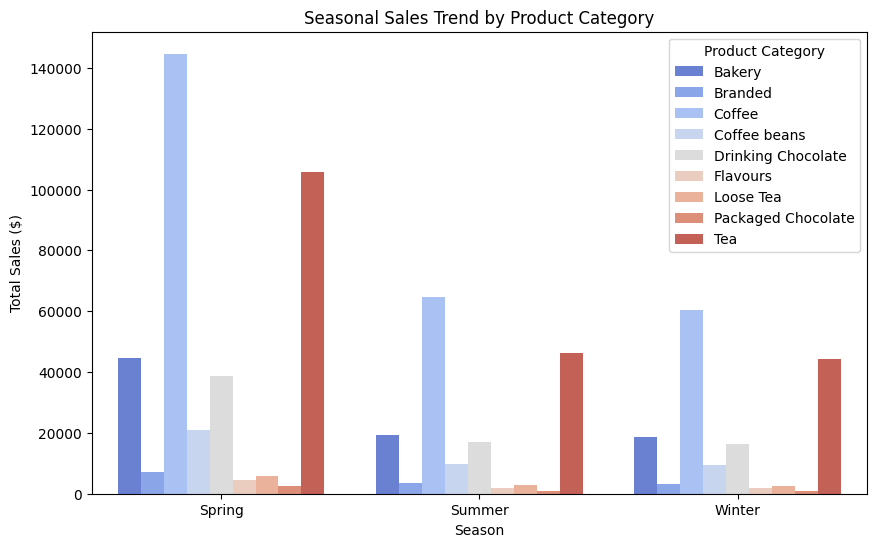

In [25]:
# Define seasons
season_mapping = {1: "Winter", 2: "Winter", 3: "Spring", 4: "Spring", 5: "Spring", 6: "Summer",
                  7: "Summer", 8: "Summer", 9: "Fall", 10: "Fall", 11: "Fall", 12: "Winter"}

df["season"] = df["month"].map(season_mapping)

# Aggregate total sales per product and season
seasonal_sales = df.groupby(["season", "product_category"])["total_bill"].sum().reset_index()

# Plot seasonal trends
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="total_bill", hue="product_category", data=seasonal_sales, palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Total Sales ($)")
plt.title("Seasonal Sales Trend by Product Category")
plt.legend(title="Product Category", bbox_to_anchor=(1,1))
plt.show()


## Sales by Day of the Week for Each Product Category

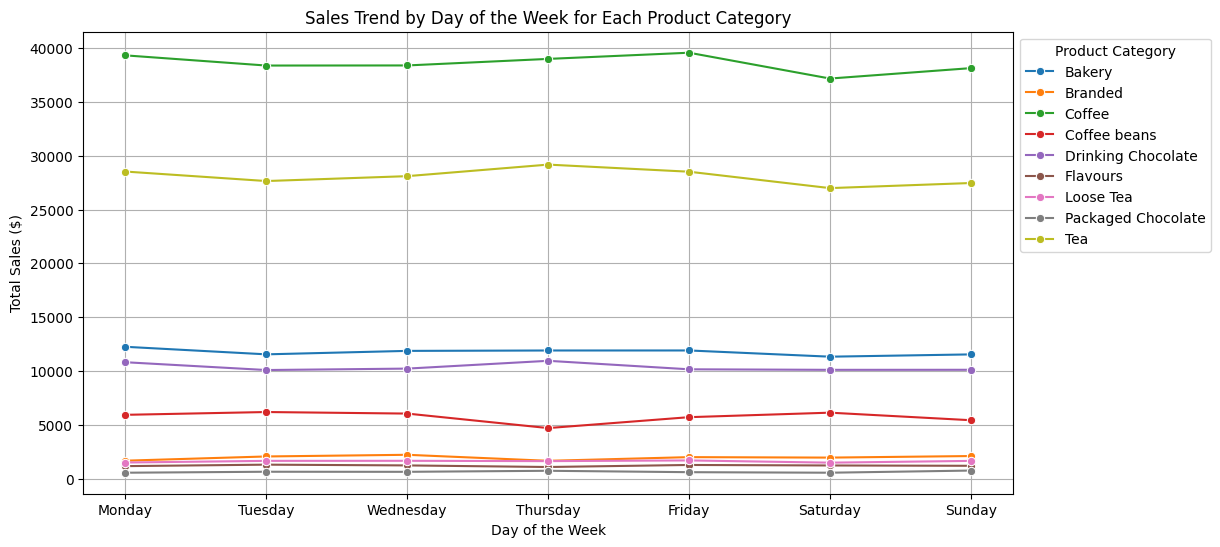

In [26]:
# Aggregate total sales by product category and day of the week
weekday_sales = df.groupby(["day_of_week", "product_category"])["total_bill"].sum().reset_index()

# Order days correctly
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_sales["day_of_week"] = pd.Categorical(weekday_sales["day_of_week"], categories=weekday_order, ordered=True)

# Plot sales by day of the week for each product category
plt.figure(figsize=(12, 6))
sns.lineplot(x="day_of_week", y="total_bill", hue="product_category", data=weekday_sales, marker="o", palette="tab10")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales ($)")
plt.title("Sales Trend by Day of the Week for Each Product Category")
plt.grid(True)
plt.legend(title="Product Category", bbox_to_anchor=(1,1))
plt.show()
